In [1]:
import sys
import os
print(sys.version)
cwd = os.getcwd()

3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [10]:
!cd $cwd
!pip uninstall basicpy -y
!rm -r BaSiCpy
!git clone https://github.com/yfukai/BaSiCpy/ # will be updated later to pip install
!cd BaSiCpy && git checkout notebook_reference && pip install .
sys.path.append(os.path.join(cwd,"BaSiCpy/src"))

Cloning into 'BaSiCpy'...
remote: Enumerating objects: 2359, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 2359 (delta 45), reused 67 (delta 29), pack-reused 2268
Receiving objects: 100% (2359/2359), 252.72 MiB | 32.34 MiB/s, done.
Resolving deltas: 100% (1048/1048), done.
Checking out files: 100% (379/379), done.
Branch 'notebook_reference' set up to track remote branch 'notebook_reference' from 'origin'.
Switched to a new branch 'notebook_reference'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/BaSiCpy
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding t

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]
INFO:basicpy.basicpy:reweighting iteration 0
INFO:basicpy.basicpy:single-step optimization score: 8.702342029209831e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 0 finished.
INFO:basicpy.basicpy:reweighting iteration 1
INFO:basicpy.basicpy:single-step optimization score: 8.326530291924428e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 1 finished.
INFO:basicpy.basicpy:reweighting score: 0.03284575790166855
INFO:basicpy.basicpy:elapsed time: 18.55713584900002 seconds
INFO:basicpy.basicpy:reweighting iteration 2
INFO:basicpy.basicpy:single-step optimization score: 8.958717216955847e-07.
INFO:basicpy.basicpy:mean of S: 1.0.
INFO:basicpy.basicpy:Iteration 2 finished.
INFO:basicpy.basicpy:reweighting score: 0.017056439071893692
INFO:basicpy.basicpy:elapsed time: 18.71043080200002 seconds
INFO:basicpy.basicpy:reweighting iteration 3
INFO:basicpy.basicpy:single

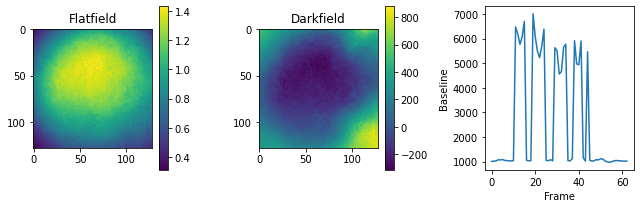

In [11]:
from basicpy import BaSiC
from basicpy import data as bdata
from matplotlib import pyplot as plt

images=bdata.wsi_brain()
basic =BaSiC(get_darkfield=True)
basic.fit(images)

fig,axes = plt.subplots(1,3,figsize=(9,3))
im=axes[0].imshow(basic.flatfield)
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Flatfield')
im=axes[1].imshow(basic.darkfield)
fig.colorbar(im,ax=axes[1])
axes[1].set_title('Darkfield')
axes[2].plot(basic.baseline)
axes[2].set_xlabel('Frame')
axes[2].set_ylabel('Baseline')
fig.tight_layout()

In [12]:
images_transformed=basic.transform(images)

INFO:basicpy.basicpy:=== BaSiC transform started ===
INFO:basicpy.basicpy:unshading in 2 threads
INFO:basicpy.basicpy:=== BaSiC transform finished in 0.13654488800000308 seconds ===


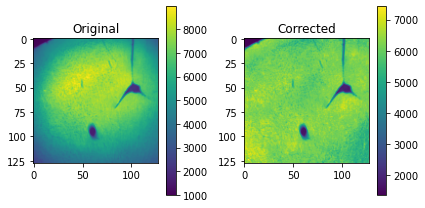

In [13]:
i=12
fig,axes = plt.subplots(1,2,figsize=(6,3))
im=axes[0].imshow(images[i])
fig.colorbar(im,ax=axes[0])
axes[0].set_title('Original')
im=axes[1].imshow(images_transformed[i])
fig.colorbar(im,ax=axes[1])
axes[1].set_title('Corrected')
fig.tight_layout()